In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score

import numpy.polynomial.polynomial as poly

In [33]:
def get_clean_data(file):
    # Reads panadas dataframe
    df = pd.read_csv(file)
    # Convert datetime to a number
    df['SALE DATE'] = pd.to_datetime(df['SALE DATE']).astype(np.int64)
    # Drop other unneeded columns
    data = df.drop(columns = ["NEIGHBORHOOD", "APARTMENT NUMBER", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT", "BOROUGH", "EASE-MENT", "ADDRESS", "ZIP CODE", "BUILDING CLASS AT TIME OF SALE", "TOTAL UNITS"])
    # Convert all other strings to int values
    data = data.astype(int)
    # print(x.info())
    return data

In [34]:
def preprocess_normalize_data(df):
    df_x_prescale = df[["BLOCK","LOT","RESIDENTIAL UNITS","COMMERCIAL UNITS","LAND SQUARE FEET", "GROSS SQUARE FEET","YEAR BUILT","TAX CLASS AT TIME OF SALE","SALE DATE"]]
    df_y = df[["SALE PRICE"]]
    # print(df_x_prescale)

    x_scaled_array = preprocessing.scale(df_x_prescale)
    y_array = np.array(df_y)

    df_z_scaled = df_x_prescale.copy()
    # print(df_z_scaled)
    # apply normalization technique to Sale Date
    column = 'SALE DATE'
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()
    # print(df_z_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(x_scaled_array, y_array, test_size = 0.8, train_size = 0.2)
    return X_train, X_test, y_train, y_test


### Linear Regression Normal

In [41]:
data = get_clean_data("cleaned_data.csv")
X_train, X_test,y_train,y_test = preprocess_normalize_data(data)
# X_train, y_train = preprocess_standard_scalar(data)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
yhat_train = linear_reg.predict(X_train)
RSS = np.sum((y_train - yhat_train) ** 2)
TSS = np.sum((y_train - np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print(Rsq)
'''
print("Coefficients", coef)
print("Intercept", inter)
print("Score", score)
'''

0.5732976318363994
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


'\nprint("Coefficients", coef)\nprint("Intercept", inter)\nprint("Score", score)\n'

In [42]:
# data = get_clean_data("cleaned_data.csv")
# X_train, X_test, y_train, y_test = preprocess_normalize_data(data)

# print(y_train)
# print(y_test)
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)
# yhat_train = linear_reg.predict(X_train)
# yhat_test = linear_reg.predict(X_test)
# # accuracy_test = linear_reg.score(X_test, y_test)
# #logreg.coef_, logreg.intercept_, 
# accuracy_test = r2_score(y_test, yhat_test)
# RSS = np.sum((y_test - yhat_test) ** 2)
# TSS = np.sum((y_test - np.mean(y_test))**2)
# Rsq = 1 - RSS/TSS
# print(RSS)
# print(TSS)
# print(Rsq)
# accuracy_train = linear_reg.score(X_train, y_train)

# print(accuracy_train, accuracy_test)



# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)

yhat_train = linear_reg.predict(X_train)
yhat_test = linear_reg.predict(X_test)


# yhat = linear_reg.predict(X_train)
#RSS = np.sum((yhat_train - y_train)**2)
#TSS = np.sum((y_train - np.mean(y_train))**2)
#R2 = 1- RSS/TSS


print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.5732976318363994
0.508892027648444


### Linear Regression F1 Score

In [18]:
f1_score_logistic_regression = f1_score(y_test, yhat_test,labels=[3,4], pos_label=3)
print("F1 Score:", f1_score_logistic_regression)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### Linear Regression with Ridge Regularization

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] [0.5732976318363993, 0.5732976318363905, 0.5732976318355129, 0.5732976317477602, 0.5732976229749653, 0.5732967481668997, 0.5732116821759666, 0.5666533077216231, 0.4335392865552937, 0.17370608177135538, 0.031598436680141506] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


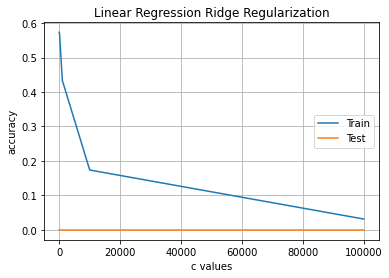

In [43]:
alpha_values = [10**i for i in range(-5,6)]
ridge_train_reg_acc = [] 
ridge_test_reg_acc = []
for alpha in alpha_values: 
    linear_reg = Ridge(alpha=alpha)
    linear_reg.fit(X_train, y_train)
    yhat_test = linear_reg.predict(X_test)
    accuracy_test = np.mean(yhat_test == y_test)
    ridge_test_reg_acc.append(accuracy_test)
    #logreg.coef_, logreg.intercept_, 
    accuracy_train = linear_reg.score(X_train, y_train)
    ridge_train_reg_acc.append(accuracy_train)
    #print("Train accuracy, \tc = ",alpha, "\tAccuracy: ",accuracy_train)
    #print("Test accuracy, \tc = ",alpha, "\tAccuracy: ", accuracy_test)

plt.plot(alpha_values, ridge_train_reg_acc, alpha_values, ridge_test_reg_acc)
plt.grid()
plt.xlabel('c values')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'center right')
plt.title('Linear Regression Ridge Regularization')

print(alpha_values, ridge_train_reg_acc, ridge_test_reg_acc)

### Linear Regression Lasso Regularization

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] [0.5732976318363993, 0.5732976318363993, 0.5732976318363993, 0.5732976318363993, 0.5732976318363935, 0.5732976318358278, 0.5732976317793211, 0.573297626135248, 0.5732970594641706, 0.5732507289051378, 0.5695804489845763] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


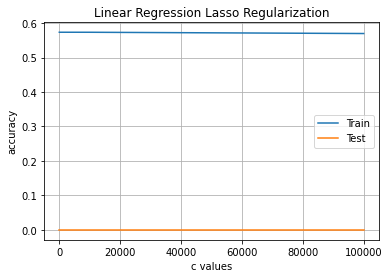

In [44]:
alpha_values = [10**i for i in range(-5,6)]
lasso_train_reg_acc = [] 
lasso_test_reg_acc = []
for alpha in alpha_values: 
    linear_reg = Lasso(alpha=alpha)
    linear_reg.fit(X_train, y_train)
    yhat_test = linear_reg.predict(X_test)
    accuracy_test = np.mean(yhat_test == y_test)
    lasso_test_reg_acc.append(accuracy_test)
    #logreg.coef_, logreg.intercept_, 
    accuracy_train = linear_reg.score(X_train, y_train)
    lasso_train_reg_acc.append(accuracy_train)
    #print("Train accuracy, \tc = ",alpha, "\tAccuracy: ",accuracy_train)
    #print("Test accuracy, \tc = ",alpha, "\tAccuracy: ", accuracy_test)

plt.plot(alpha_values, lasso_train_reg_acc, alpha_values, lasso_test_reg_acc)
plt.grid()
plt.xlabel('c values')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc = 'center right')
plt.title('Linear Regression Lasso Regularization')

print(alpha_values, lasso_train_reg_acc, lasso_test_reg_acc)

### Linear Regression Polynomial Transformation

In [48]:
# data = get_clean_data("cleaned_data.csv")
# X_train, X_test, y_train, y_test = preprocess_normalize_data(data)

poly_features = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

In [54]:
linear_reg = LinearRegression() # regular logistic regression, no regularization
linear_reg.fit(X_poly_train, y_train)
yhat_test = linear_reg.predict(X_poly_test)
# accuracy_test = linear_reg.score(X_poly_test, y_test)
accuracy_test = np.mean(yhat_test == y_test)
#logreg.coef_, logreg.intercept_, 
accuracy_train = linear_reg.score(X_poly_train, y_train)

print(accuracy_train, accuracy_test)

0.8318673665539753 0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=47c5d483-7427-4b12-afc5-c21a2f7e3d4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>